In [12]:
from pathlib import Path
import re

p = Path('.')
fulldos = {}
for x in p.glob("PDOS*.OUT"):
    m = re.match("PDOS_S([0-9]+)_A([0-9]+).OUT", str(x))
    s = int(m.group(1))
    a = int(m.group(2))
    if not (s in fulldos):
        fulldos[s] = {}
    fulldos[s][a] = []
    with open(x, "r") as f:
        block = []
        for l in f.readlines():
            m = re.match("\s*([-0-9E\.]+)\s*([-0-9E\.]+)", l)
            if m is None:
                # start of a new block
                fulldos[s][a].append(block)
                block = []
            else:
                block.append([float(m.group(1)),float(m.group(2))])
# fulldos[s][a][lms][row][col]

<IPython.core.display.Javascript object>


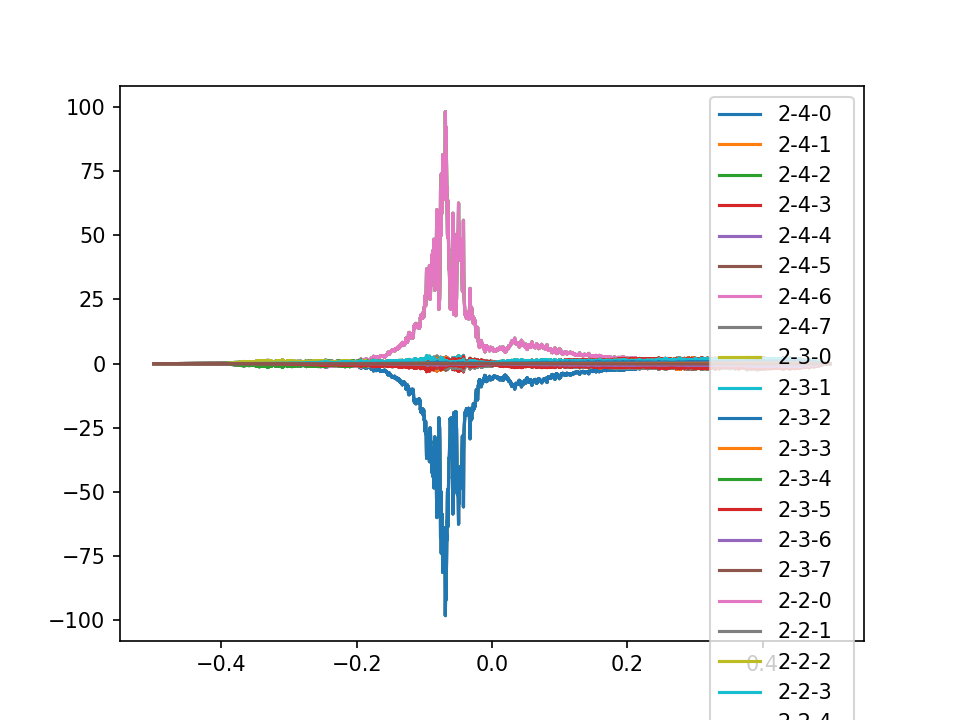

In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
for s in fulldos:
    for a in fulldos[s]:
        for lms in range(0,len(fulldos[s][a])):
            cols = [list(x) for x in zip(*fulldos[s][a][lms])] # index by col,row
            plt.plot(cols[0],cols[1],label=str(s) + "-" + str(a) + "-" + str(lms))
plt.legend()

In [21]:
import logging
# sum over all atoms of a species, keeping the (lms) projections
sdos = {}
for s in fulldos:
    sdos[s] = []
    for lms in range(0,len(fulldos[s][1])):
        sdos[s].append([])
        for i in range(0,len(fulldos[s][1][lms])):
            x = fulldos[s][1][lms][i][0]
            y = 0.0
            for a in fulldos[s]:
                if x != fulldos[s][a][lms][i][0]:
                    # this shouldn't happen
                    logging.warning("inconsistent x points found!")
                else:
                    # partial sum
                    y = y + fulldos[s][a][lms][i][1]
            sdos[s][lms].append([x,y])

<IPython.core.display.Javascript object>


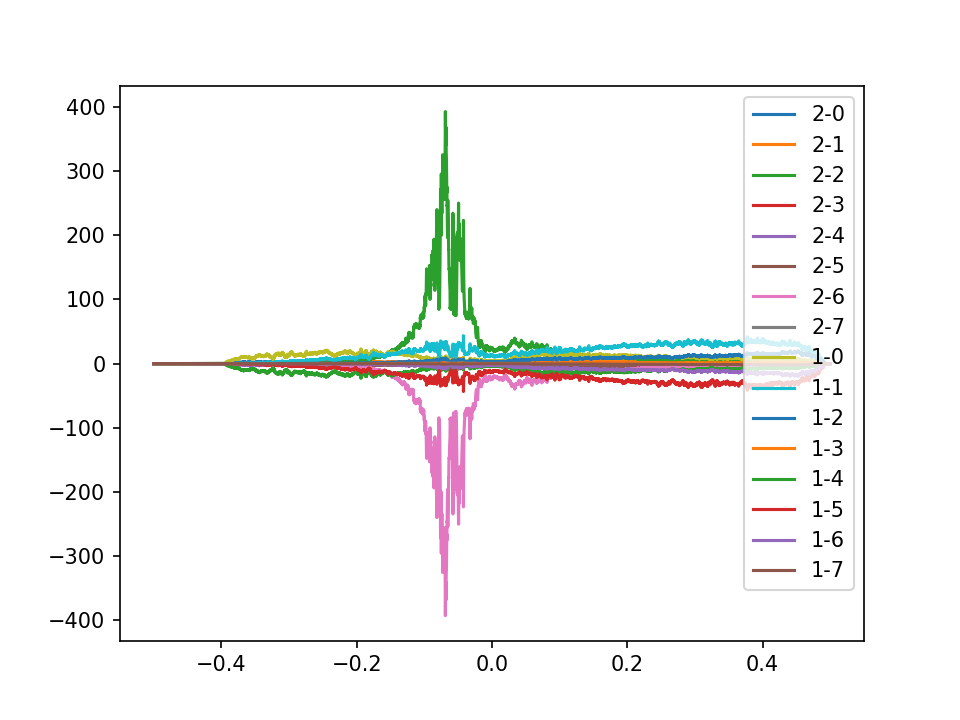

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
for s in sdos:
        for lms in range(0,len(sdos[s])):
            cols = [list(x) for x in zip(*sdos[s][lms])] # index by col,row
            plt.plot(cols[0],cols[1],label=str(s)+"-"+str(lms))
plt.legend()

In [26]:
# write sdos's to file
for s in sdos:
    with open("SDOS" + str(s) + ".OUT", "w") as f:
        for lms in range(0,len(sdos[s])):
            for i in range(0,len(sdos[s][lms])):
                f.write(str(sdos[s][lms][i][0]) + ", " + str(sdos[s][lms][i][1]) + "\n")
            f.write("\n")

In [30]:
import logging
# sum over all atoms and lms's of a species
qdos = {}
for s in fulldos:
    qdos[s] = []
    for i in range(0,len(fulldos[s][1][0])):
        x = fulldos[s][1][0][i][0]
        y = 0.0
        for lms in range(0,len(fulldos[s][1])):
            for a in fulldos[s]:
                if x != fulldos[s][a][lms][i][0]:
                    # this shouldn't happen
                    logging.warning("inconsistent x points found!")
                else:
                    # partial sum
                    if lms < len(fulldos[s][1])/2:
                        y = y + fulldos[s][a][lms][i][1]
                    else:
                        y = y - fulldos[s][a][lms][i][1]
        qdos[s].append([x,y])

<IPython.core.display.Javascript object>


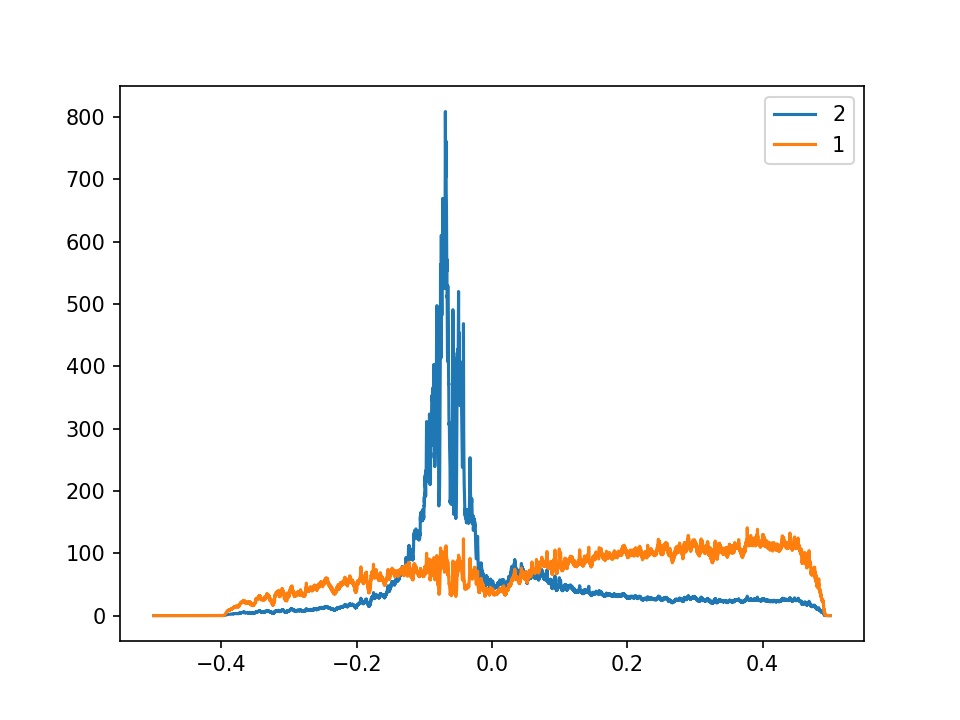

In [31]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
for s in sdos:
    cols = [list(x) for x in zip(*qdos[s])] # index by col,row
    plt.plot(cols[0],cols[1],label=str(s))
plt.legend()

In [36]:
import numpy
fulldosarr = {}
for s in fulldos:
    fulldosarr[s] = numpy.array(list(fulldos[s].values()))
    nat = fulldosarr[s].shape[0]
    fulldosarr[s] = fulldosarr[s].sum(axis=0).swapaxes(1,2)
    fulldosarr[s][:,0,:] /= nat

<IPython.core.display.Javascript object>


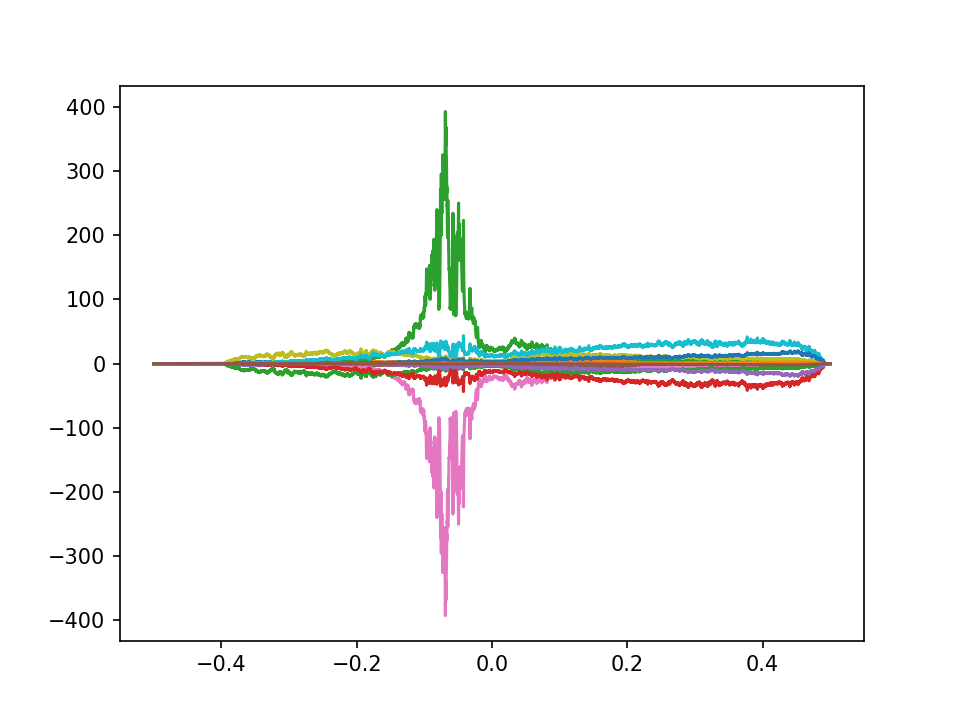

In [37]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
for s in fulldosarr:
        for lms in range(0,len(fulldosarr[s])):
            plt.plot(fulldosarr[s][lms][0],fulldosarr[s][lms][1])